In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
import numpy as np
import matplotlib.pyplot as pl

In [3]:
def model0(k):
    return (200./(k+10.))**5

In [4]:
def gen_2Dgauss(N, Lx, Ly, model):

    field = np.zeros((N,N), dtype = complex)

    dkx = (2.*np.pi)/Lx
    dky = (2.*np.pi)/Ly

    for ix in range(0, N):
        if ix <= N/2:
            kx = ix*dkx
        else:
            kx = (ix-N)*dkx
    
        for iy in range(0, N):
            if iy <= N/2:
                ky = iy*dky
            else:
                ky = (iy-N)*dky
        
            kval = (kx**2 + ky**2)**0.5
        
            field[ix, iy] = np.random.normal(0.,(model(kval)/2.)**0.5) + np.random.normal(0.,(model(kval)/2.)**0.5)*1j

    # Now we have to set \delta(-k) = \delta^*(k)
    # Note that \delta_n = \delta_{n+N} and therefore we have to set \delta(2dk,-dk) = \delta^*(2dk,dk)
    for ix in range(N/2+1, N):
    
        jx = N-ix
    
        field[ix, 0] = field[jx, 0].real - field[jx, 0].imag*1j
        field[0, ix] = field[0, jx].real - field[0, jx].imag*1j

        for iy in range(1, N):
        
            jy = N-iy
        
            field[ix, iy] = field[jx, jy].real - field[jx, jy].imag*1j

    if N % 2 == 0:
        for ix in range(1, N/2):
            jx = N-ix
            
            field[N/2,ix] = field[N/2,jx].real - field[N/2,jx].imag*1j


        kval = dkx*N/2
        # Set the complex part to zero if there is no partner (note the factor of 2 difference)
        field[0,N/2] = np.random.normal(0.,model(kval)**0.5) + 0.*1j;
        field[N/2,0] = np.random.normal(0.,model(kval)**0.5) + 0.*1j;
        
        kval = (dkx*N/2)*(2**0.5)
        
        field[N/2,N/2] = np.random.normal(0.,model(kval)**0.5) + 0.*1j;

    field[0,0] = 0. + 0.*1j
    
    return field

In [5]:
def calc_power(N, field, dk, Nshot, Lx, Ly, norm):
    
    dkx = (2.*np.pi)/Lx
    dky = (2.*np.pi)/Ly
    
    V= Lx*Ly
    
    power  = np.zeros(N, dtype=float)
    Nmodes = np.zeros(N, dtype=float)
    
    for ix in range(0,N):
        if ix <= N/2:
            kx = ix*dkx
        else:
            kx = (ix-N)*dkx
            
        for iy in range(0,N):
            if iy <= N/2:
                ky = iy*dky
            else:
                ky = (iy-N)*dky
                
            kval = (kx**2 + ky**2)**0.5
            
            if kval>0:
                power[int(kval/dk)] = power[int(kval/dk)] + field[ix][iy].real**2 + field[ix][iy].imag**2 - Nshot
                Nmodes[int(kval/dk)]= Nmodes[int(kval/dk)] + 1

                
    iNonZeros = np.where(Nmodes != 0)
    iZeros = np.where(Nmodes ==0)
    power[iNonZeros] = power[iNonZeros]/Nmodes[iNonZeros]
    
    k = np.linspace( dkx/2., (N-1)*dkx + dkx/2., num=N)
    k[iZeros] = 0
    
    return V*np.trim_zeros(power)/norm, np.trim_zeros(k)

In [6]:
def main():
    
    Lx = 1.
    Ly = 1.
    V = Lx*Ly
    N = 101
    dk = (2.*np.pi)/Lx
    
    Normaliz = 1.0
    
    #-----------------------------------------#
    #-- Generate Gaussian random field -------#
    #-----------------------------------------#
    
    kspace_field = gen_2Dgauss(N, Lx, Ly, model0)
    
    config_field = np.fft.ifft2(kspace_field)*kspace_field.size**0.5

    
    power, k = calc_power(N, kspace_field, dk, 0.0 , Lx, Ly, Normaliz)

    pl.title('Power Spectrum')
    pl.xlabel('k')
    pl.ylabel('Power Spectrum')
    pl.xscale('log', nonposy='clip')
    pl.yscale('log', nonposy='clip')
    pl.plot(k,power,'b')
    pl.plot(k,model0(k),'r')
    #pl.show
    
    
    
    fig, ax = pl.subplots()
    im = ax.imshow(config_field.real, cmap=pl.cm.jet)
    fig.colorbar(im, ax=ax)
    pl.title("field.real, config_space")
    #pl.show()
    
    fig, ax = pl.subplots()
    im = ax.imshow(config_field.imag, cmap=pl.cm.jet)
    fig.colorbar(im, ax=ax)
    pl.title("field.imag, config_space")
    #pl.show()

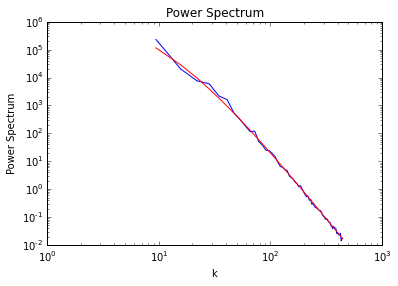

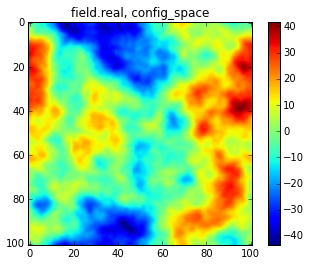

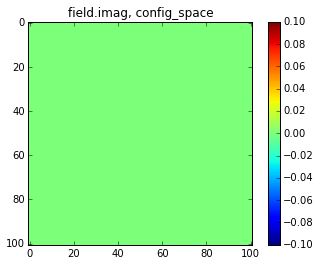

In [7]:

if __name__ == '__main__':
    main()

#Matrix de Covarianza

Hacer cien realizaciones del espectro de potencias.

Los coeficinetes de la matriz $C_{ij}$ se calculan como:

$ C_{ij} = \frac{1}{N-1}\sum_{\alpha \beta}^{N} \left( P_\alpha(k_i) - \bar P(k_i) \right)\cdot \left( P_\beta(k_j) - \bar P(k_j) \right)$



In [8]:
PowerSpect = []

In [9]:
Lx = 1.
Ly = 1.
V = Lx*Ly
N = 101
dk = (2.*np.pi)/Lx
Normaliz = 1.0

In [10]:
PowerSpect = []
for i in range(100):
    kspace_field = gen_2Dgauss(N, Lx, Ly, model0)    
    config_field = np.fft.ifft2(kspace_field)*kspace_field.size**0.5
    power, k = calc_power(N, kspace_field, dk, 0.0 , Lx, Ly, Normaliz)
    PowerSpect.append(power)

In [11]:
PowerSpect = np.array(PowerSpect)

In [12]:
PowerSpect.shape

(100, 70)

In [13]:
PowerAverage = np.zeros(70)

for i in range(70):
    PowerAverage[i] =  average(PowerSpect[:,i])

In [14]:
power

array([  8.30888988e+04,   3.11542978e+04,   1.26545026e+04,
         7.73258551e+03,   2.73721696e+03,   1.29528873e+03,
         7.20027416e+02,   3.42707195e+02,   2.57689796e+02,
         1.24005961e+02,   8.51538978e+01,   5.80738949e+01,
         3.28778218e+01,   2.93331018e+01,   2.53032235e+01,
         1.62112343e+01,   1.46500787e+01,   9.74708745e+00,
         7.26519365e+00,   8.06450623e+00,   5.64059456e+00,
         3.66985691e+00,   3.77505039e+00,   3.05986578e+00,
         2.03443793e+00,   1.75364396e+00,   1.38953834e+00,
         1.52899469e+00,   1.15928121e+00,   8.73253987e-01,
         7.71364718e-01,   6.42982496e-01,   6.44296303e-01,
         5.22403272e-01,   4.45440694e-01,   4.29247622e-01,
         3.40616378e-01,   2.90894880e-01,   2.67434647e-01,
         2.73155964e-01,   2.17886843e-01,   2.09386839e-01,
         1.81143280e-01,   1.46474359e-01,   1.52602744e-01,
         1.19589570e-01,   1.06875656e-01,   1.01474198e-01,
         1.00612306e-01,

In [16]:
N = 100
CovarianceMatrix = np.zeros([70,70])

for i in range(70):
    print i
    for j in range(70):
        aux = 0
        for a in range(N):
            for b in range(N):
                aux += (PowerSpect[a][i]-PowerAverage[i])*(PowerSpect[b][j]-PowerAverage[j])
        CovarianceMatrix[i][j]= 1./(N-1)*aux
            

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69


In [22]:
import scipy

In [24]:
Cinv = linalg.inv(CovarianceMatrix)

In [27]:
Cinv[:,0]

array([  5.03289359e+04,   1.49906797e+06,   4.75225048e+04,
         2.90595121e+06,   1.02638894e+07,  -3.95602293e+07,
         5.91360434e+07,  -1.23491270e+06,   1.66022344e+08,
        -7.07014852e+06,   3.74084656e+08,  -2.14169547e+08,
         2.04355211e+09,  -4.82783459e+08,   2.81969975e+09,
         2.35438927e+09,  -5.02042191e+09,  -2.16269612e+08,
         1.80635337e+08,  -4.28710670e+09,  -1.92023179e+10,
        -5.52386366e+09,   1.63771306e+10,   7.61684561e+09,
        -2.35334598e+10,   9.76591420e+09,  -2.28035106e+10,
        -2.27323179e+10,  -1.96695243e+10,  -2.88922178e+10,
        -2.01364150e+10,  -3.75808696e+10,  -1.23047339e+10,
        -2.83036593e+10,  -2.91988327e+09,  -1.06279156e+11,
        -7.27125252e+10,  -1.09284096e+11,   2.19123449e+11,
         2.64734854e+10,   4.02707243e+11,   4.89530935e+11,
        -6.46100033e+11,   5.45577153e+11,  -5.15730737e+10,
         5.02101353e+11,  -4.26697459e+11,  -2.01745519e+11,
         3.15090965e+11,

/Users/flgomezc/anaconda/lib/python2.7/site-packages/IPython/kernel/__main__.py:1: RuntimeWarning: divide by zero encountered in log
  if __name__ == '__main__':


<matplotlib.colorbar.Colorbar instance at 0x10630fc68>

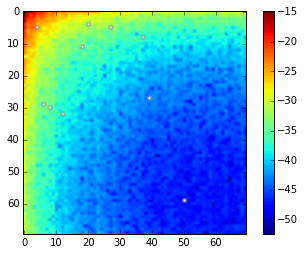

In [38]:
imshow(log(abs(CovarianceMatrix)))
colorbar()

In [36]:
CovarianceMatrix

array([[  3.85322956e-07,  -2.52868190e-08,  -1.66321042e-07, ...,
          2.38283018e-13,  -4.78288565e-13,   1.01916231e-14],
       [  1.42087840e-07,   1.72341713e-08,   6.77325509e-10, ...,
          1.18782649e-14,   2.52278557e-14,  -1.53681781e-14],
       [ -7.94728597e-08,  -4.08276765e-09,   1.68861012e-09, ...,
         -5.07338279e-15,   4.91638156e-15,  -3.92503090e-17],
       ..., 
       [  1.51008274e-13,  -3.55271368e-15,  -1.41749687e-14, ...,
         -1.24145940e-20,   1.16702317e-20,  -9.29169475e-21],
       [  3.55989088e-14,  -4.09100363e-15,   7.57194532e-15, ...,
          1.40316569e-20,  -8.88101211e-21,  -8.52594275e-21],
       [ -1.17706069e-13,  -9.09710018e-15,  -4.58107177e-15, ...,
          4.33355745e-21,   2.26731041e-21,  -6.07040279e-21]])

<function matplotlib.pyplot.colorbar>

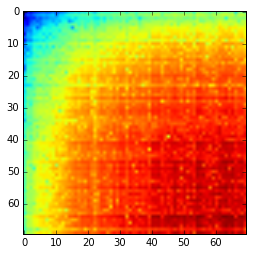

In [39]:
imshow(log(abs(Cinv)))
colorbar